# Evaluation Project - 1

# BaseBall case Study

## Poblem Statement

This dataset utilizes data from 2014 Major League Baseball seasons in order to develop an algorithm that predicts the number of wins for a given team in the 2015 season based on several different indicators of success. There are 16 different features that will be used as the inputs to the machine learning and the output will be a value that represents the number of wins.

Input features: Runs, At Bats, Hits, Doubles, Triples, Homeruns, Walks, Strikeouts, Stolen Bases, Runs Allowed, Earned Runs, Earned Run Average (ERA), Shutouts, Saves, Complete Games and Errors

Output: Number of predicted wins (W)

To understand the columns meaning, follow the link given below to understand the baseball statistics:

https://en.wikipedia.org/wiki/Baseball_statistics

# The Important Libraries

In [1]:
# importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import os
import scipy as stats
%matplotlib inline
warnings.filterwarnings('ignore')

# LOADING the Dataset

In [2]:
# Reading the csv file from dataset

baseball = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/baseball.csv")
baseball.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


* Our data Set contains 16 features and one label ( w - win)

## Features

R-Runs

AB-At Bats

H- Hits

2B-Doubles

3B-Triples

HR-Homeruns

BB- Walks

SO-Strikeouts

SB-Stolen Bases

RA-Runs Allowed

ER-Erned Runs

ERA-Earned Run Average

CG-Complete Games

SHO-Shutouts

SV-Saves

E-Error

# The problems is to predict wins from given targets

# Exploratory Data Analysis (EDA)

In [3]:
# checking shape of our Data
baseball.shape

(30, 17)

* there are 30 rows and 17 features.

In [4]:
# Now we will check the data types of our data
baseball.dtypes

W        int64
R        int64
AB       int64
H        int64
2B       int64
3B       int64
HR       int64
BB       int64
SO       int64
SB       int64
RA       int64
ER       int64
ERA    float64
CG       int64
SHO      int64
SV       int64
E        int64
dtype: object

* All features contain numeric data type ,so we can proceed further.

In [5]:
# Now we will check any Null value is there
baseball.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

* So there are no null values are present in our data we can proceed forward

In [6]:
# Now let us check is there any duplicate data is present in our data if present then we will remove the same
baseball.drop_duplicates(inplace=True)

In [7]:
baseball.shape

(30, 17)

* So there is no duplicate data present in our data. let us check further

In [8]:
#now check how any catagorical data is present in our data 
baseball.nunique()

W      24
R      28
AB     29
H      29
2B     22
3B     23
HR     27
BB     29
SO     29
SB     27
RA     30
ER     30
ERA    30
CG      9
SHO    12
SV     20
E      21
dtype: int64

In [9]:
baseball.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.2 KB


In [10]:
# Now check whether any space present in our label
baseball.loc[baseball['W']==" "]

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E


In [11]:
# now check the statistical description of our data
baseball.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


* This gives the statistical information of the dataset. Maximum different in data is present in SO-strikeouts it ranges from 973 to 1518, that means there may be outliers present so we will look it later.

The values of data have high range so we will we have to standardise the data. Now we will move further processing Count all features is 30

# EDA Conclusion

1.This is a Regression Problem since the Label column ("W") has Continuous type of Data.

2.No need to encode the data.

3.Missing data and duplicate data not found.

4.Check for Outliers and Skewness.

# Data Visualisation

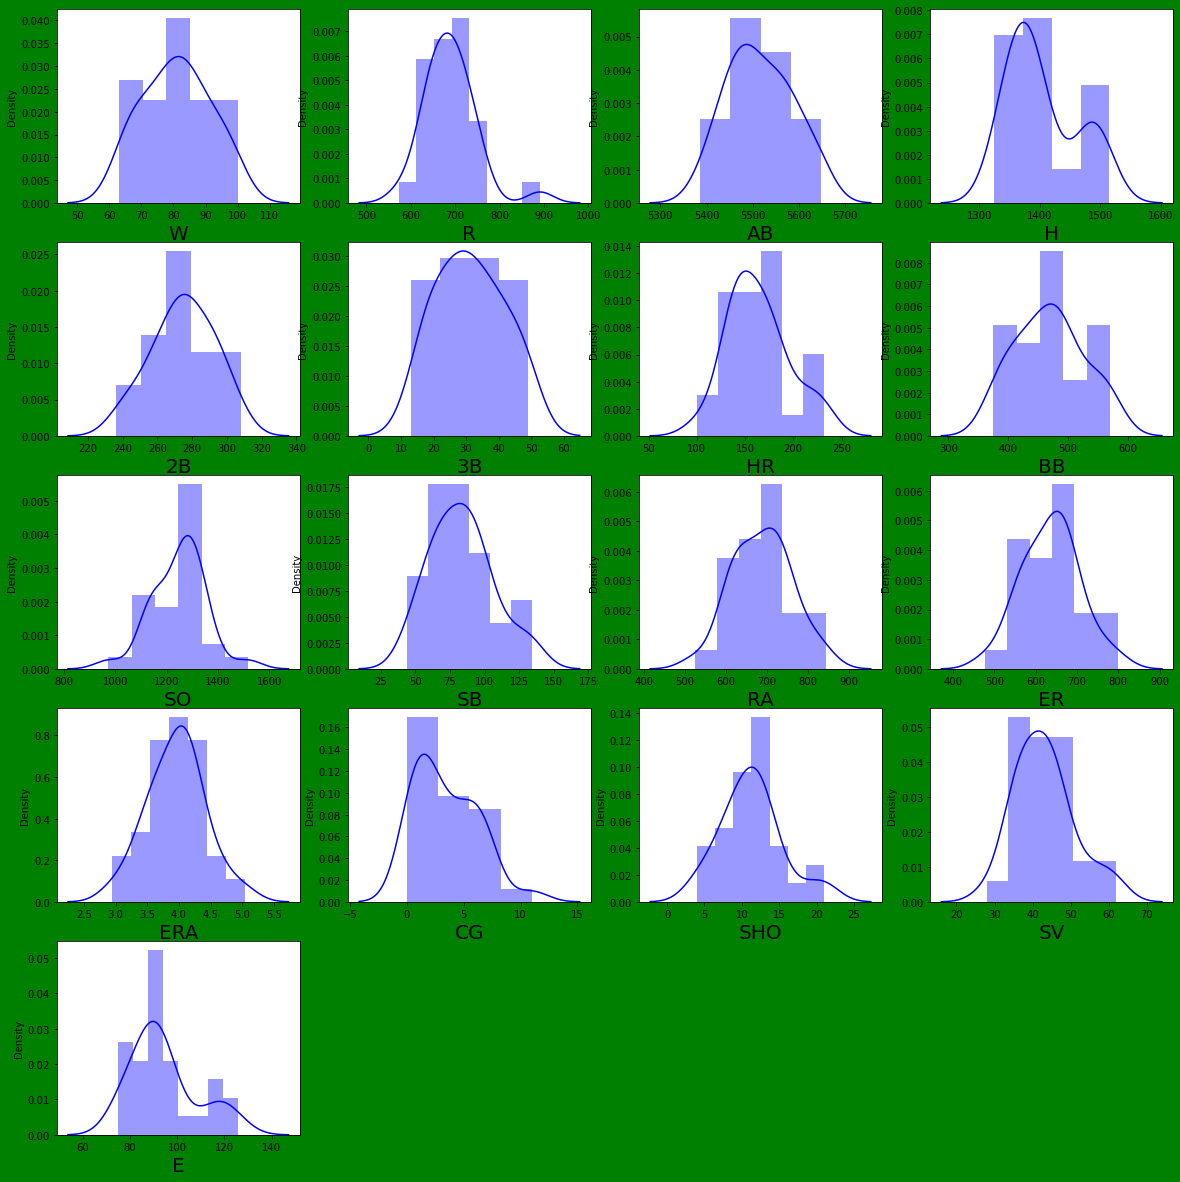

In [12]:
# Checking how the data has been distriubted in each column
plt.figure(figsize=(20,25), facecolor='green')
plotnumber = 1

for column in baseball:
    if plotnumber<=18:
        ax = plt.subplot(6,4,plotnumber)
        sns.distplot(baseball[column],color='b')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

* From the distribution graphs above, it can be seen that most of the columns are normally distributed and few of them have skewness. The target column ['W'] is normally distributed and there is no skewness present. The column 'R'(Runs) is normal. The same differences can be seen in the columns 'BB','SO','RA','ERA'and'SHO'. Eventhough they looks normal but has skewness. The column('AB') looks normally distributed and has no skewness. The value of AB mostly lies between 5300-5650. The column 'H','HR','SV','E','CG' are not normal and the they are skewed to the right. The doubles rate('2B') is between 230-300 and it looks normally distributed but bit skewness is present. The distribution of the data present in the columns '3B','SB', and 'ER' is normal and has no skewness.

# Now we will check Bivarient plots as there is no Catagorical feature univarient plots are not required

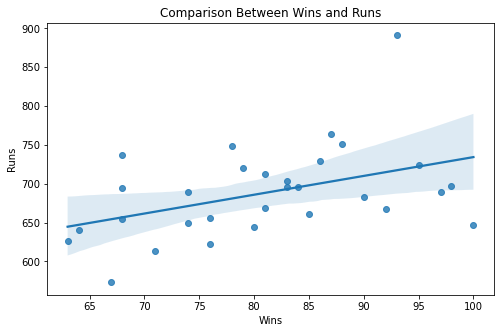

In [13]:
#1st We will plot Label wins and runs

plt.figure(figsize=(8,5))
plt.title("Comparison Between Wins and Runs")
sns.regplot(x='W',y='R',data=baseball)
plt.xlabel("Wins",fontsize=10)
plt.ylabel("Runs",fontsize=10)
plt.show()

From this we can find that there is very small linear relationship between the variables.

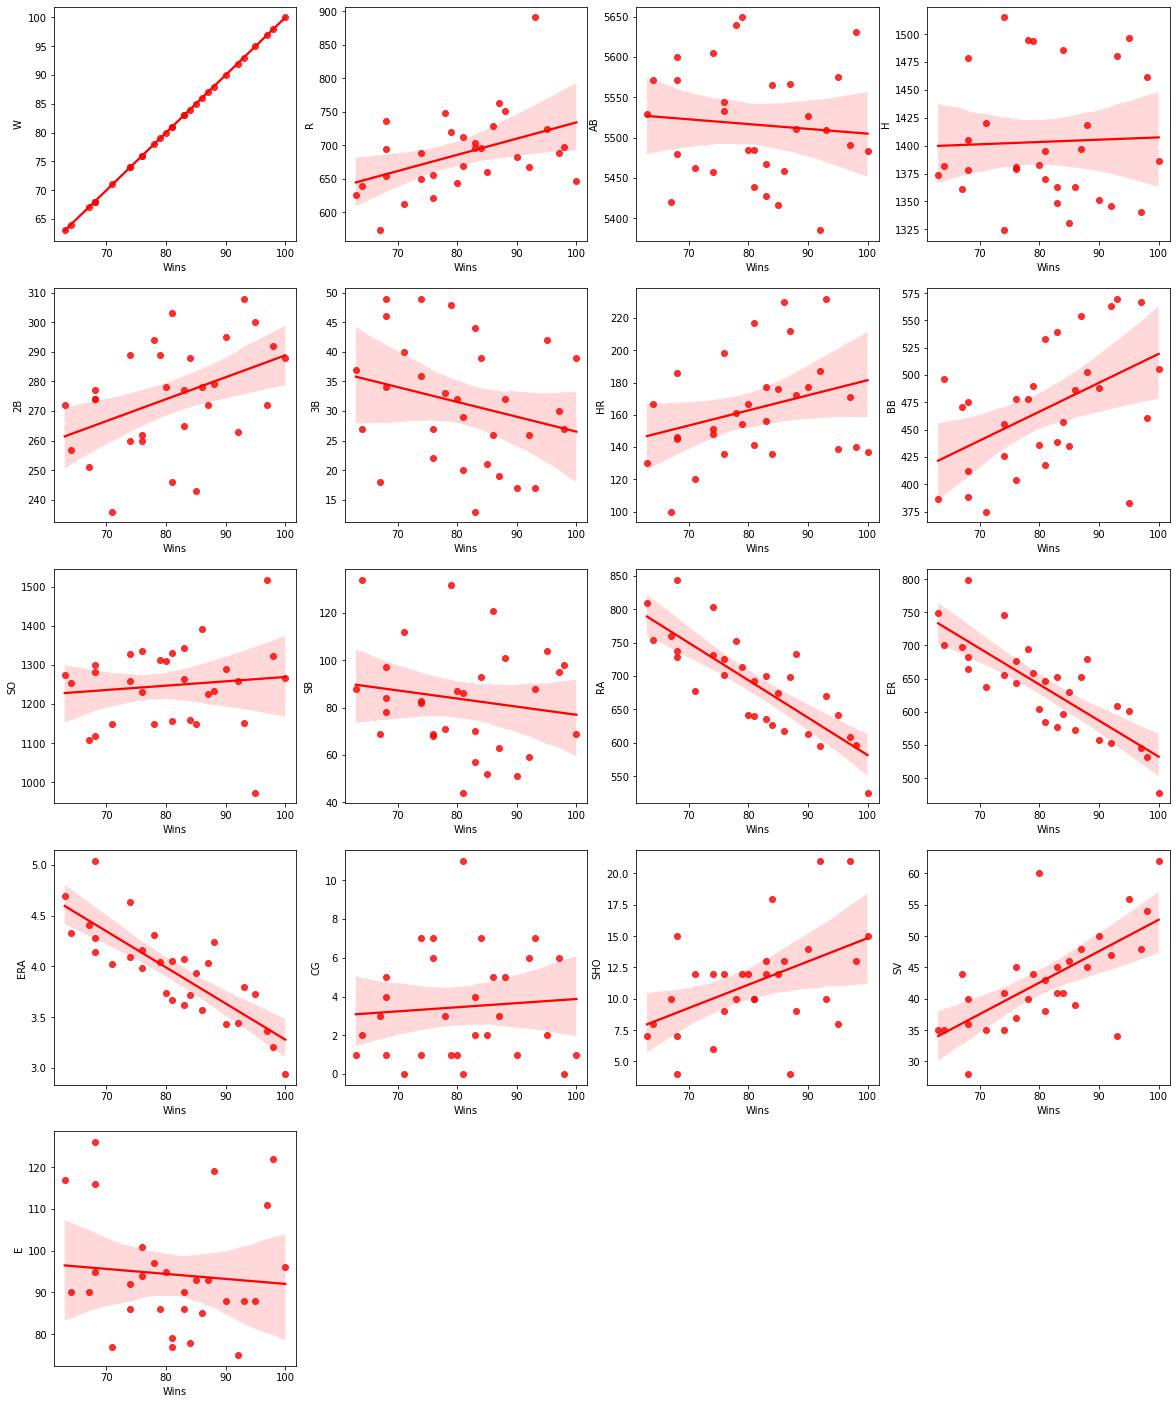

In [14]:
plt.figure(figsize=(20,25))
p=1
for i in baseball:
    if p<=17:
        plt.subplot(5,4,p)
        sns.regplot(x='W',y=i,data=baseball,color='r')
        plt.xlabel("Wins")
        plt.ylabel(i)
    p+=1
    
plt.show()

* From this figuare we can identify that some features have high positive linear relationship like('SV','BB')

1.Some feature there is positive linear relation but not that much like('R','2B','HR','SHO')

2.Some features like 'E','AB,'SB are lightly negatively related

3.Some features like 'ERA',RA,ER, have higly negatvie relation with label,

4.Some features like CG and H doesnot have any relation with Label.

## So, Now we will plot Label vs CG and Label VS H to see any relation exist

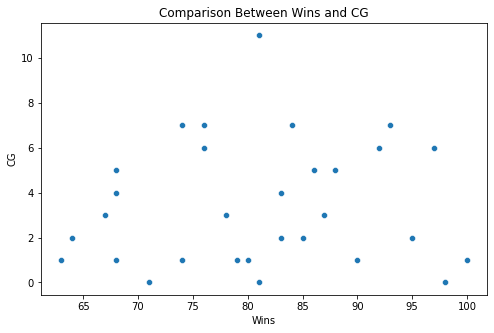

In [15]:
plt.figure(figsize=(8,5))
plt.title("Comparison Between Wins and CG")
sns.scatterplot(x='W',y='CG',data=baseball)
plt.xlabel("Wins",fontsize=10)
plt.ylabel("CG",fontsize=10)
plt.show()

* From this figure, we can clearly Notice that there is no relationship between CG-Complete Games and wins

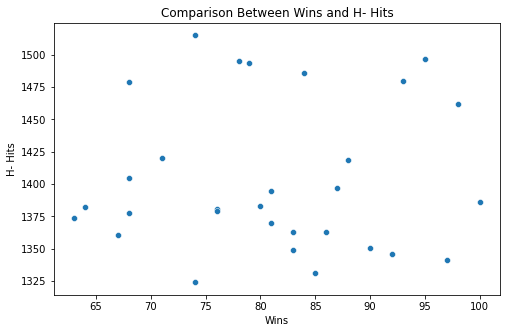

In [16]:
plt.figure(figsize=(8,5))
plt.title("Comparison Between Wins and H- Hits")
sns.scatterplot(x='W',y='H',data=baseball)
plt.xlabel("Wins",fontsize=10)
plt.ylabel("H- Hits",fontsize=10)
plt.show()

* This figure also note that there no relationship between H- Hits and Wins

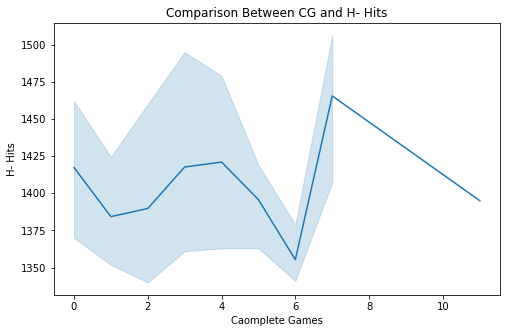

In [17]:
# Now we will check ay relation between CG and Hints
plt.figure(figsize=(8,5))
plt.title("Comparison Between CG and H- Hits")
sns.lineplot(x='CG',y='H',data=baseball)
plt.xlabel("Caomplete Games",fontsize=10)
plt.ylabel("H- Hits",fontsize=10)
plt.show()

## Either we can remove these features or else proceed . 1st we will proceed without removing data

## Now We will check the relation between ER and ERA

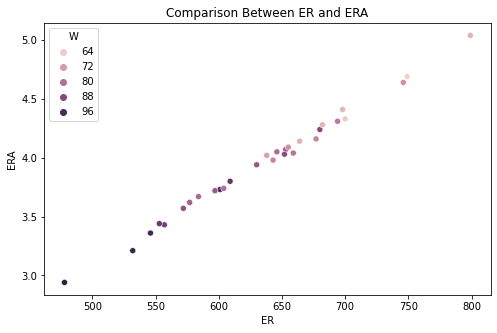

In [18]:
plt.figure(figsize=(8,5))
plt.title("Comparison Between ER and ERA")
sns.scatterplot(x='ER',y='ERA',data=baseball,hue='W')
plt.xlabel("ER",fontsize=10)
plt.ylabel("ERA",fontsize=10)
plt.show()

# This shows that ER and ERA are highly related So we can remove any one of the feature

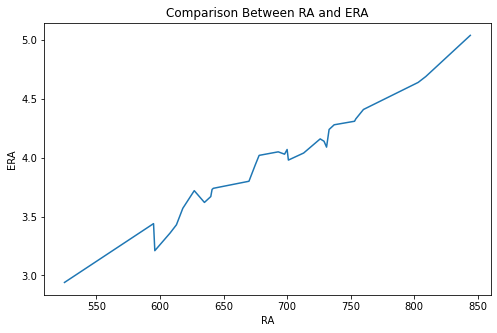

In [19]:
# let us check the relation between RA and ERA
plt.figure(figsize=(8,5))
plt.title("Comparison Between RA and ERA")
sns.lineplot(x='RA',y='ERA',data=baseball)
plt.xlabel("RA",fontsize=10)
plt.ylabel("ERA",fontsize=10)
plt.show()

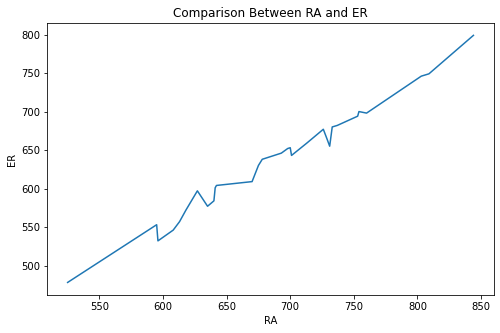

In [20]:
plt.figure(figsize=(8,5))
plt.title("Comparison Between RA and ER")
sns.lineplot(x='RA',y='ER',data=baseball)
plt.xlabel("RA",fontsize=10)
plt.ylabel("ER",fontsize=10)
plt.show()

## *So We will remove ERA from our data As the graphs showa that the have high multicolinearity

In [21]:
baseball=baseball.drop('ERA',axis=1)# Removing ERA from data as high colinearity with ER an RA

In [22]:
baseball.shape

(30, 16)

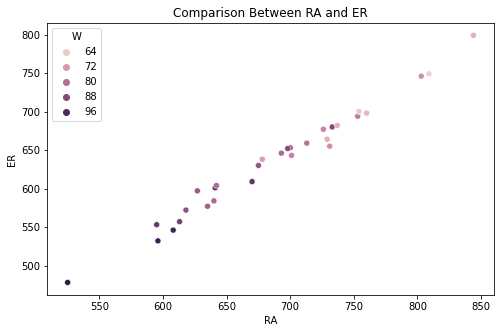

In [23]:
# let us check the relation between RA and ER
plt.figure(figsize=(8,5))
plt.title("Comparison Between RA and ER")
sns.scatterplot(x='RA',y='ER',data=baseball,hue='W')
plt.xlabel("RA",fontsize=10)
plt.ylabel("ER",fontsize=10)
plt.show()

# Best Feature Selection

## As there are so many features and Some of them does not have any relation ad some of them have high negative linear relation we will find 12 best parameters using SelectPercentile Feature selection method

In [24]:
from sklearn.feature_selection import SelectPercentile
from sklearn.feature_selection import chi2
x=baseball.drop('W',axis=1)
y=baseball.W

In [25]:
# Getting best features
spercentile=SelectPercentile(score_func=chi2,percentile=90)
spercentile=spercentile.fit(x,y)
bestf=spercentile.get_support(indices=True)

In [26]:
# Our new data frame containing 12 features:
feature=x.columns[bestf]
baseball_new=x[feature]
baseball_new['W']=baseball['W']
baseball_new 

,R,H,3B,HR,BB,SO,SB,RA,ER,CG,SHO,SV,E,W
0,724,1497,42,139,383,973,104,641,601,2,8,56,88,95
1,696,1349,44,156,439,1264,70,700,653,2,12,45,86,83
2,669,1395,29,141,533,1157,86,640,584,11,10,38,79,81
3,622,1381,27,136,404,1231,68,701,643,7,9,37,101,76
4,689,1515,49,151,455,1259,83,803,746,7,12,35,86,74
5,891,1480,17,232,570,1151,88,670,609,7,10,34,88,93
6,764,1397,19,212,554,1227,63,698,652,3,4,48,93,87
7,713,1370,20,217,418,1331,44,693,646,0,10,43,77,81
8,644,1383,32,167,436,1310,87,642,604,1,12,60,95,80
9,748,1495,33,161,478,1148,71,753,694,3,10,40,97,78


In [27]:
feature # These are the best 12 feature

Index(['R', 'H', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER', 'CG', 'SHO', 'SV',
       'E'],
      dtype='object')

* These are the features that we removed 'AB','2B','SHO'

In [28]:
#Now We will chech the corelation between features using Corr()
baseball_new.corr()

,R,H,3B,HR,BB,SO,SB,RA,ER,CG,SHO,SV,E,W
R,1.000000,0.482856,-0.070072,0.671283,0.402452,-0.054726,0.081367,-0.041623,-0.041245,0.232042,-0.103274,-0.096380,-0.023262,0.430751
H,0.482856,1.000000,0.478694,-0.090855,-0.118281,-0.398830,0.413444,0.224324,0.252489,0.147955,-0.145559,-0.130371,-0.033173,0.037612
3B,-0.070072,0.478694,1.000000,-0.430915,-0.454949,-0.141196,0.457437,0.314125,0.340225,-0.065898,-0.041396,-0.142370,0.126678,-0.251118
HR,0.671283,-0.090855,-0.430915,1.000000,0.425691,0.359923,-0.136567,-0.103903,-0.085922,0.156502,-0.019119,-0.028540,-0.207597,0.307407
BB,0.402452,-0.118281,-0.454949,0.425691,1.000000,0.233652,-0.098347,-0.416445,-0.452663,0.462478,0.426004,0.099445,-0.075685,0.484342
SO,-0.054726,-0.398830,-0.141196,0.359923,0.233652,1.000000,0.030968,-0.129745,-0.161612,-0.093418,0.237721,0.126297,0.155133,0.111850
SB,0.081367,0.413444,0.457437,-0.136567,-0.098347,0.030968,1.000000,0.132290,0.143068,-0.020783,-0.106563,-0.183418,0.079149,-0.157234
RA,-0.041623,0.224324,0.314125,-0.103903,-0.416445,-0.129745,0.132290,1.000000,0.991018,-0.016659,-0.636862,-0.616224,0.198996,-0.812952
ER,-0.041245,0.252489,0.340225,-0.085922,-0.452663,-0.161612,0.143068,0.991018,1.000000,-0.020221,-0.630192,-0.589663,0.136921,-0.809435
CG,0.232042,0.147955,-0.065898,0.156502,0.462478,-0.093418,-0.020783,-0.016659,-0.020221,1.000000,0.241676,-0.367766,-0.140047,0.080533


* We will visualize the same using heat map then we can clearly identify the details easily

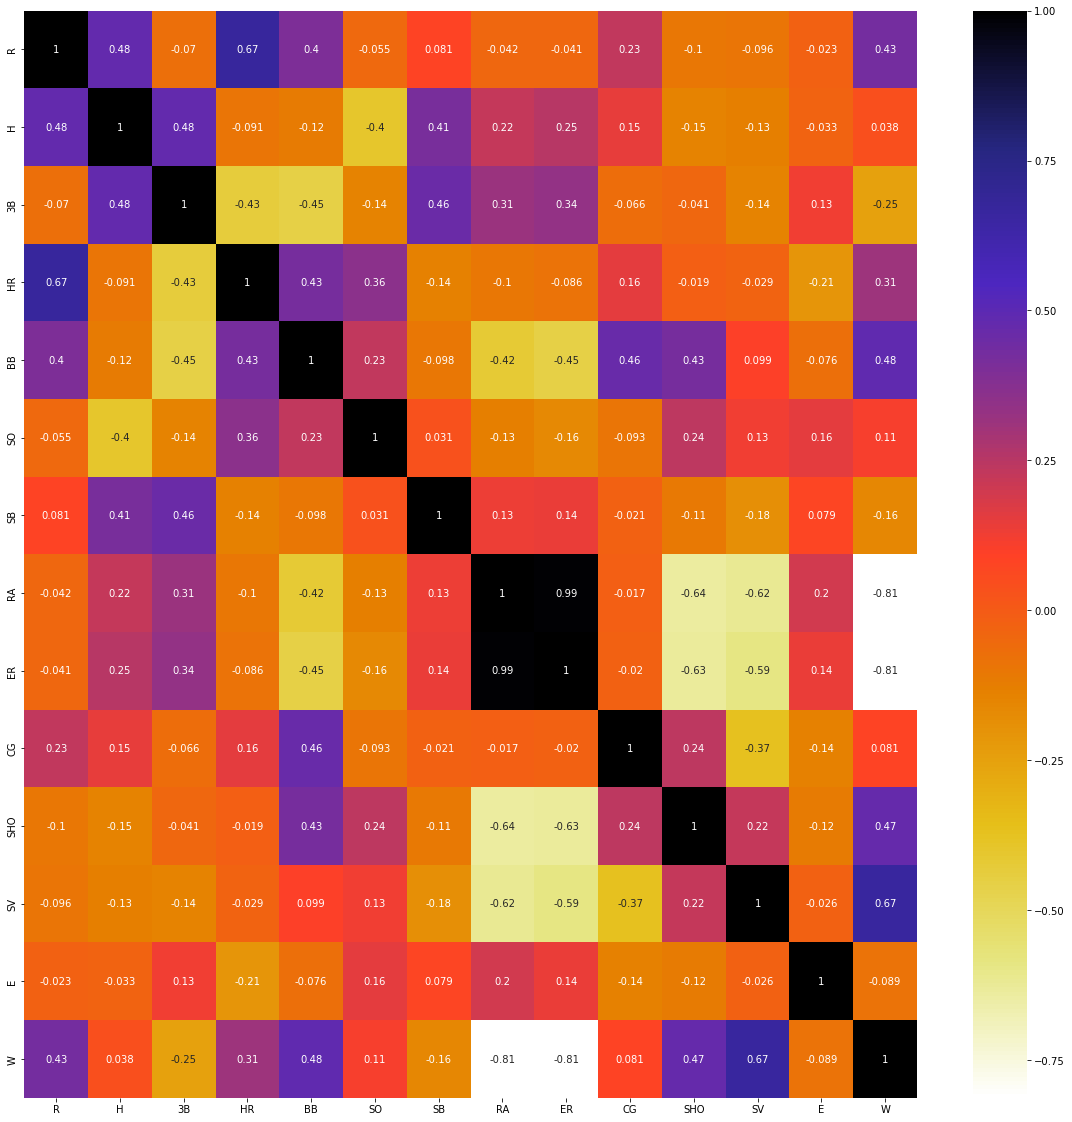

In [29]:
plt.figure(figsize=(20,20))
sns.heatmap(baseball_new.corr(),annot=True,cmap='CMRmap_r')
plt.show()

## conclusion:

1. RA and ER have high multicoliearity as we pointed earilier.

2.The Label 'W' is positively correlated with following features 'R','H','HR','BB','SO',CG','SV'

3.The Label 'W' is Negatively corelated with '3B','SB','RA','ER' od this ER and RA were high negative corelation.

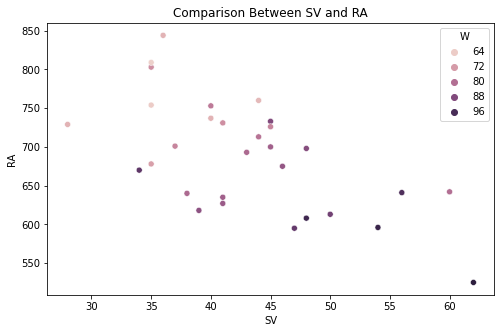

In [30]:
# SV ANd RA were positevily corelated let visualize
plt.figure(figsize=(8,5))
plt.title("Comparison Between SV and RA")
sns.scatterplot(x='SV',y='RA',data=baseball,hue='W')
plt.xlabel("SV",fontsize=10)
plt.ylabel("RA",fontsize=10)
plt.show()

* SV and ER also positively related.

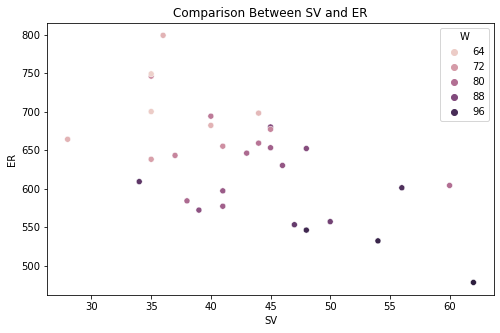

In [31]:
# SV ANd RA were positevily corelated letus visualize
plt.figure(figsize=(8,5))
plt.title("Comparison Between SV and ER")
sns.scatterplot(x='SV',y='ER',data=baseball,hue='W')
plt.xlabel("SV",fontsize=10)
plt.ylabel("ER",fontsize=10)
plt.show()

ER and RA have huge multicoliniarity, We we will deal with the same using VIF later.* 

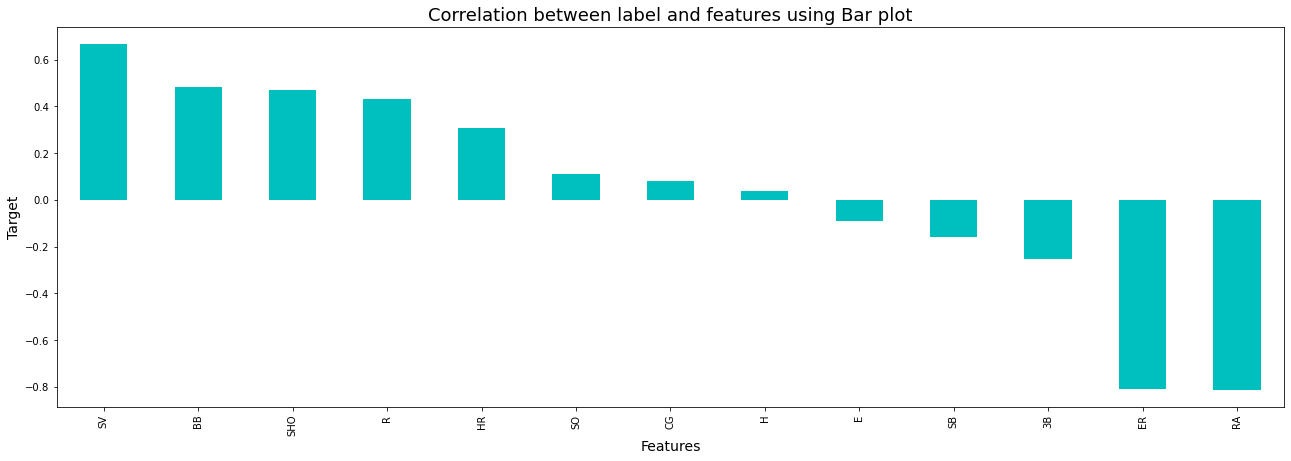

In [32]:
# Let us visualise the the correlation between LAbel and other features
plt.figure(figsize=(22,7))
baseball_new.corr()['W'].sort_values(ascending=False).drop(['W']).plot(kind='bar',color='c')
plt.xlabel('Features',fontsize=14)
plt.ylabel('Target',fontsize=14)
plt.title('Correlation between label and features using Bar plot',fontsize=18)
plt.show()

## As explained ER and RA have high negative coliniarity with label. 1st seven features have positive relation with label, last 5 features have -ve corelation

## Conclusion from visualization:

1. CG and H does not have any relationship with the Label

2.RA, ER and ERA Are highly related to each other.(ie high multicolinearity exits)

3.ER And RA highly negative relation with Label, ERA we already droped.

# Checking for Outliers:

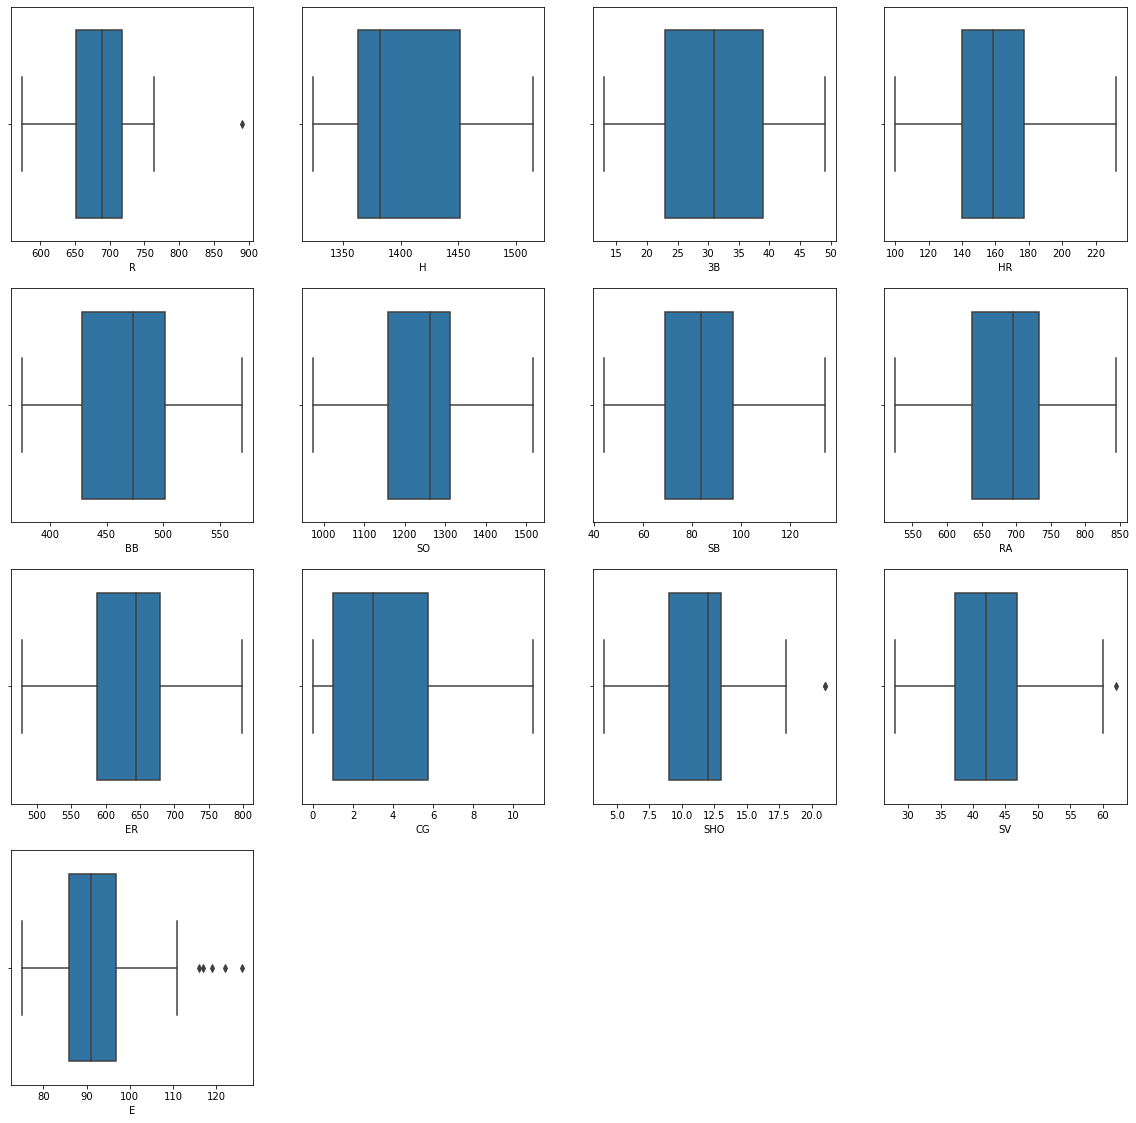

In [33]:
# Ist plot the box plot for outlier detection
plt.figure(figsize=(20,25))
p=1
for i in baseball_new:
    if p<=13:
        plt.subplot(5,4,p)
        sns.boxplot(baseball_new[i])
        plt.xlabel(i)
      
    p+=1
    
plt.show()

## so we have found outlier in columns 'R','SV' and 'E' .

# So, removing the outliers using zscore and IQR techniques before building the model and selected best one.

In [34]:
from scipy.stats import zscore
out_features=baseball_new[['R','SV','E']]
z=np.abs(zscore(out_features))
z

,R,SV,E
0,0.619078,1.671607,0.461470
1,0.134432,0.249879,0.607197
2,0.332906,0.654856,1.117242
3,1.146419,0.784104,0.485758
4,0.013270,1.042600,0.607197
5,3.509647,1.171848,0.461470
6,1.311430,0.637623,0.097152
7,0.428681,0.008617,1.262970
8,0.765626,2.188598,0.048576
9,1.034489,0.396360,0.194303


In [35]:
# Now removing the data above Zscore and creating new DF
new_df = baseball_new[(z<3).all(axis=1)]

new_df.shape# New data after removing outliers

(29, 14)

In [36]:
# old data
baseball_new.shape

(30, 14)

In [37]:
#So total loss in data is
(30-29)/30*100

3.3333333333333335

## It is affordable loss of data now we will check with IQR method

In [38]:
# 1st quantile
Q1=out_features.quantile(0.25)

# 3rd quantile
Q3=out_features.quantile(0.75)

# IQR
IQR=Q3 - Q1

new_df1=baseball_new[~((baseball_new < (Q1 - 1.5 * IQR)) |(baseball_new > (Q3 + 1.5 * IQR))).any(axis=1)]

In [39]:
new_df1.shape

(23, 14)

In [40]:
##So total loss in data is
(30-23)/30*100

23.333333333333332

## # As this is very small dataset loss of 23% is not acceptable. so let us continue with zscore method

In [41]:
baseball_new=new_df

# skewness

In [42]:
baseball_new.skew()

R     -0.215364
H      0.783772
3B     0.090124
HR     0.450862
BB     0.151193
SO    -0.233815
SB     0.494966
RA     0.018155
ER     0.018461
CG     0.854980
SHO    0.526943
SV     0.627480
E      0.840271
W      0.119013
dtype: float64

* As we noted earlier in visualization that H, CG, SV, E have high skewness so we have to reduce the skewness

In [43]:
skewed_col=['H','CG','SV','E']
from sklearn.preprocessing import PowerTransformer # importing power transform for removal of skewness
scaler = PowerTransformer(method='yeo-johnson')

In [44]:
baseball_new[skewed_col] = scaler.fit_transform(baseball_new[skewed_col].values)
baseball_new[skewed_col].head()

,H,CG,SV,E
0,4.163336e-16,-0.307098,1.532753,-0.348265
1,-2.498002e-16,-0.307098,0.312020,-0.540820
2,0.000000e+00,2.011315,-0.664137,-1.326125
3,-8.326673e-17,1.264463,-0.820689,0.650818
4,4.718448e-16,1.264463,-1.149165,-0.540820


In [45]:
# New Skewness
baseball_new.skew()

R     -0.215364
H      0.000000
3B     0.090124
HR     0.450862
BB     0.151193
SO    -0.233815
SB     0.494966
RA     0.018155
ER     0.018461
CG    -0.045947
SHO    0.526943
SV    -0.000925
E      0.065585
W      0.119013
dtype: float64

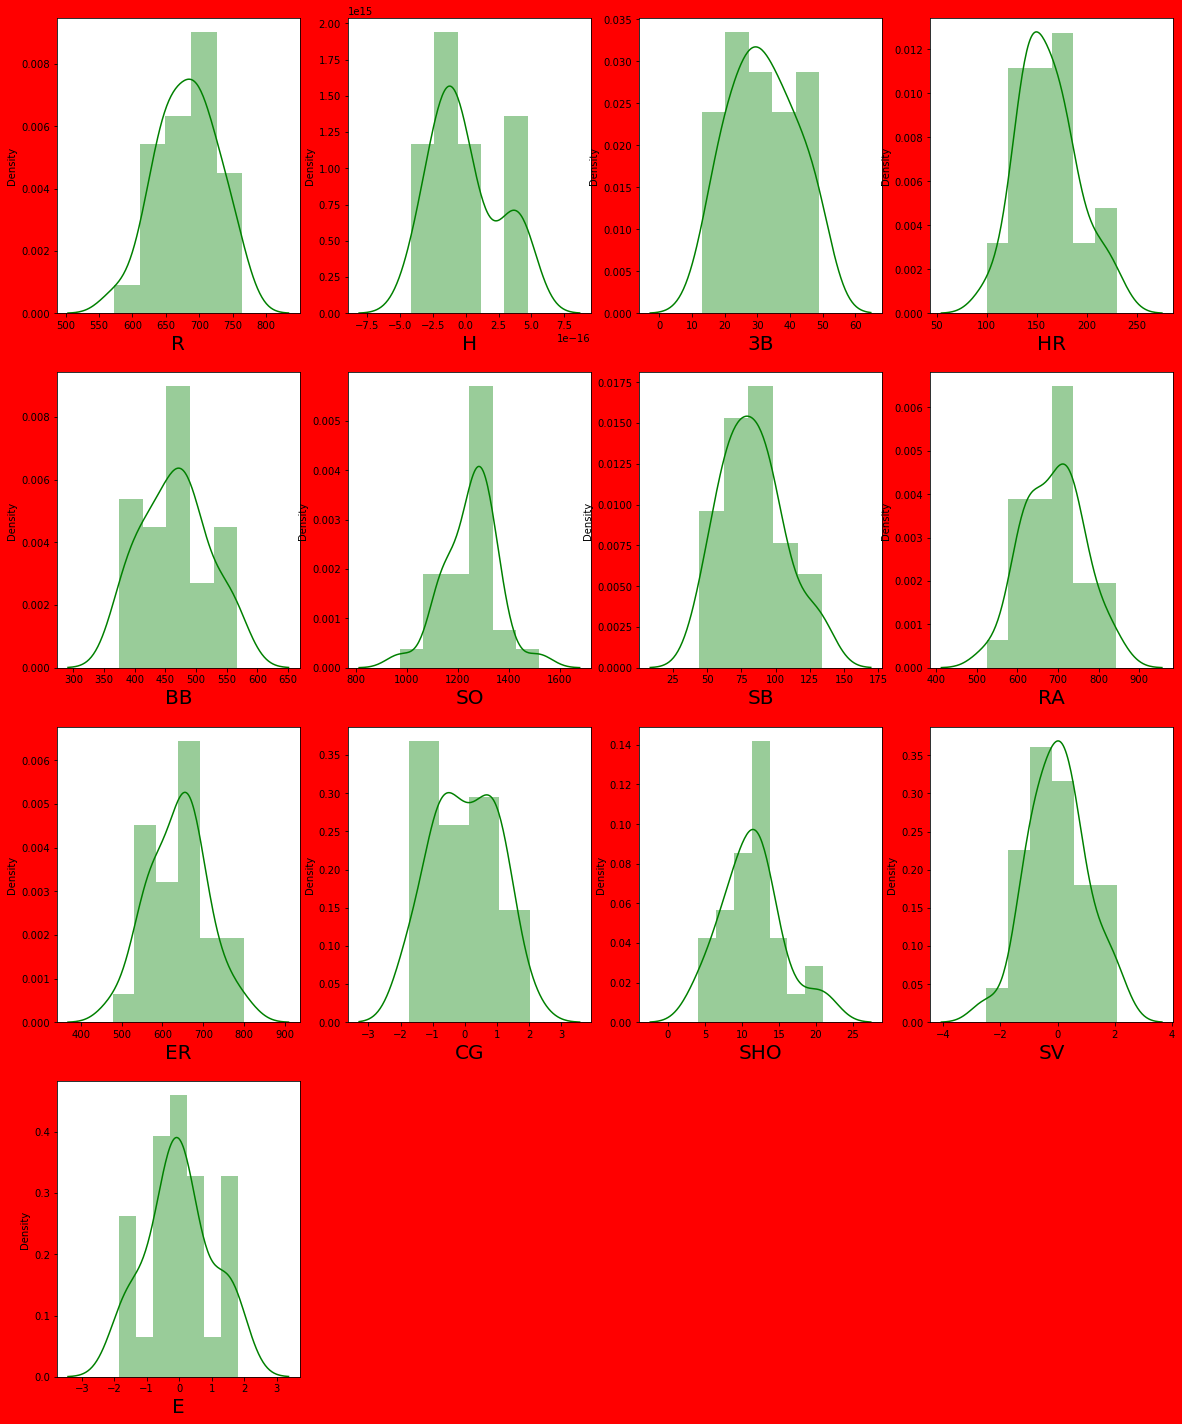

In [46]:
# Let us visualize again
plt.figure(figsize=(20,25), facecolor='red')
plotnumber = 1

for column in baseball_new:
    if plotnumber<=13:
        ax = plt.subplot(4,4,plotnumber)
        sns.distplot(baseball_new[column],color='green')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

## From this plot, we can clearily notice that the skewness have been removed. So Now let us continue

# Data Preprocessing:

In [47]:
#Separating the independent and target variables into x and y

x = baseball_new.drop("W", axis=1)
y = baseball_new["W"]

print("Feature Dimension=",x.shape)
print("Label Dimension", y.shape)

Feature Dimension= (29, 13)
Label Dimension (29,)


# Standard Scalarization

In [48]:
# importing standard scalar
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x

,R,H,3B,HR,BB,SO,SB,RA,ER,CG,SHO,SV,E
0,0.962544,1.677099,1.006150,-0.741927,-1.605198,-2.550612,0.936132,-0.660979,-0.508052,-0.318538,-0.787002,1.525342,-0.331782
1,0.298863,-0.859143,1.185227,-0.109958,-0.462096,0.093683,-0.516377,0.160226,0.235800,-0.318538,0.236737,0.316899,-0.528395
2,-0.312105,-0.056327,-0.228819,-0.664354,1.232098,-0.935611,0.225038,-0.674967,-0.752214,2.045861,-0.252844,-0.661518,-1.343100
3,-1.308298,-0.056327,-0.432228,-0.860039,-1.162721,-0.230683,-0.618422,0.174077,0.093091,1.272829,-0.513555,-0.819468,0.661049
4,0.137737,1.677099,1.622636,-0.289647,-0.155686,0.044143,0.095038,1.575971,1.555853,1.272829,0.236737,-1.151562,-0.528395
5,1.964209,-0.056327,-1.295827,1.631637,1.579494,-0.269583,-0.884526,0.132517,0.221537,0.109259,-2.064039,0.679747,0.102400
6,0.698146,-0.859143,-1.182758,1.767734,-0.877217,0.770980,-2.082843,0.063208,0.135920,-1.710665,-0.252844,0.057881,-1.618728
7,-0.852595,-0.056327,0.068703,0.269125,-0.520476,0.556008,0.267558,-0.646992,-0.465016,-0.873179,0.236737,1.894794,0.255933
8,1.555951,1.677099,0.166017,0.065014,0.270944,-1.019210,-0.466233,0.891396,0.819308,0.109259,-0.252844,-0.360397,0.399615
9,1.631727,-0.056327,0.068703,0.434620,0.717576,-0.211199,0.824915,0.616173,0.620346,0.766520,-0.513555,0.316899,1.528668


# Checking VIF values to solve multicollinearity:

In [49]:
#As we noticed earlier there is multicoliearity exists between RA and ER let us check using VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor # imported
vif=pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif['Features']=x.columns

In [50]:
#check the values
vif

,VIF values,Features
0,4.266916,R
1,3.017642,H
2,2.707033,3B
3,6.119421,HR
4,3.183953,BB
5,2.866972,SO
6,1.964089,SB
7,177.901666,RA
8,169.723859,ER
9,1.879516,CG


* This clearly shows us that there is multicolinearity exists between variable RA and ER so lets us remove any one and try the same procedure 

In [51]:
x.drop('ER',axis=1,inplace=True)# removing the ER from data
vif=pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif['Features']=x.columns
vif

,VIF values,Features
0,3.984645,R
1,2.811392,H
2,2.689239,3B
3,4.297142,HR
4,2.754040,BB
5,2.254454,SO
6,1.865988,SB
7,3.936941,RA
8,1.824057,CG
9,2.892884,SHO


## Now all the value come down to below 5 so we can move forward with our data

# Building the model:

In [52]:
# importing necessary libraries:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from sklearn.ensemble import GradientBoostingRegressor

In [53]:
# finding the best Random State
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30, random_state=i)
    GBR=GradientBoostingRegressor()
    GBR.fit(x_train, y_train)
    pred = GBR.predict(x_test)
    acc=r2_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Maximum r2 score is ",maxAccu," on Random_state ",maxRS)

Maximum r2 score is  0.7750066281453687  on Random_state  4


* So our best Random state is 4 and R2Score is .77

In [54]:
# split the data using random state 4
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30, random_state=4)

In [55]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.linear_model import Lasso,Ridge

# 1. LinearRegression

In [56]:
LR = LinearRegression()
LR.fit(x_train,y_train)
pred=LR.predict(x_test)
print('R2_score:',r2_score(y_test,pred))
print('Mean Absolute Error:-',mean_absolute_error(y_test, pred))
print('Mean Squared Error:-',mean_squared_error(y_test, pred))
print("Root Mean Squared Error:-",np.sqrt(mean_squared_error(y_test, pred)))

R2_score: 0.7893960894591908
Mean Absolute Error:- 3.9153410803864293
Mean Squared Error:- 18.9439517555597
Root Mean Squared Error:- 4.352465020601509


## Linear Regression we have obtained 78.93 % of accuracy

# 2. RandomForestRegressor

In [57]:
RFR=RandomForestRegressor()
RFR.fit(x_train,y_train)
pred=RFR.predict(x_test)
print('R2_score:',r2_score(y_test,pred))
print('Mean Absolute Error:-',mean_absolute_error(y_test, pred))
print('Mean Squared Error:-',mean_squared_error(y_test, pred))
print("Root Mean Squared Error:-",np.sqrt(mean_squared_error(y_test, pred)))

R2_score: 0.7523840104309636
Mean Absolute Error:- 3.6855555555555544
Mean Squared Error:- 22.27321111111111
Root Mean Squared Error:- 4.719450297557027


## Random Forest Regressor we obtained 78.76% accuracy

# 3. KNN Regressor

In [58]:
knn=KNN()
knn.fit(x_train,y_train)
pred=knn.predict(x_test)
print('R2_score:',r2_score(y_test,pred))
print('Mean Absolute Error:-',mean_absolute_error(y_test, pred))
print('Mean Squared Error:-',mean_squared_error(y_test, pred))
print("Root Mean Squared Error:-",np.sqrt(mean_squared_error(y_test, pred)))

R2_score: 0.6081800713697503
Mean Absolute Error:- 4.933333333333333
Mean Squared Error:- 35.24444444444444
Root Mean Squared Error:- 5.936703162904849


## Knn Regressor we obtained 60.81%

# 4.GradientBoosting Regressor

In [59]:
GBR=GradientBoostingRegressor()
GBR.fit(x_train,y_train)
pred=GBR.predict(x_test)
print('R2_score:',r2_score(y_test,pred))
print('Mean Absolute Error:-',mean_absolute_error(y_test, pred))
print('Mean Squared Error:-',mean_squared_error(y_test, pred))
print("Root Mean Squared Error:-",np.sqrt(mean_squared_error(y_test, pred)))

R2_score: 0.7738641943099455
Mean Absolute Error:- 3.335195843379223
Mean Squared Error:- 20.34105531182392
Root Mean Squared Error:- 4.510105909158223


## Gradient Boosting Regression we obtained 82.79% accuracy

# 5. Lasso

In [60]:
lasso=Lasso()
lasso.fit(x_train,y_train)
pred=lasso.predict(x_test)
print('R2_score:',r2_score(y_test,pred))
print('Mean Absolute Error:-',mean_absolute_error(y_test, pred))
print('Mean Squared Error:-',mean_squared_error(y_test, pred))
print("Root Mean Squared Error:-",np.sqrt(mean_squared_error(y_test, pred)))

R2_score: 0.8550897321654929
Mean Absolute Error:- 3.0899226911807762
Mean Squared Error:- 13.03476804249653
Root Mean Squared Error:- 3.610369516060168


## Lasso we obtained accuracy is 85.50%

# 6.Ridge

In [61]:
rd=Ridge()
rd.fit(x_train,y_train)
pred=rd.predict(x_test)
print('R2_score:',r2_score(y_test,pred))
print('Mean Absolute Error:-',mean_absolute_error(y_test, pred))
print('Mean Squared Error:-',mean_squared_error(y_test, pred))
print("Root Mean Squared Error:-",np.sqrt(mean_squared_error(y_test, pred)))

R2_score: 0.8364953920393802
Mean Absolute Error:- 3.5612593009006037
Mean Squared Error:- 14.707340414828101
Root Mean Squared Error:- 3.8350150475360723


## Ridge, we obtained accuracy of 83.64%

# Finally we reached at a Conclusion of our Model is with random state 4, Lasso have the best accuracy

# cross validation score

In [62]:
from sklearn.model_selection import cross_val_score

In [63]:
#Linear Regression CVS
print(cross_val_score(LR,x,y,cv=5).mean())
#Random Forest Regression CVS
print(cross_val_score(RFR,x,y,cv=5).mean())
#GradientBoosting Regression
print(cross_val_score(GBR,x,y,cv=5).mean())
#KNN 
print(cross_val_score(knn,x,y,cv=5).mean())
#Ridge
print(cross_val_score(rd,x,y,cv=5).mean())
#Lasso
print(cross_val_score(lasso,x,y,cv=5).mean())

0.38356301815651384
-0.6109862787566811
-1.488766670222621
-0.20180727622468578
0.4233767198499452
0.4796378159794751


## From the difference of both R2 score and Cross Validation score we can conclude that Ridge Regression as our best fitting model.

# Hyperparameter Tuning:

In [64]:
from sklearn.model_selection import GridSearchCV

In [65]:
param={'alpha':[1.0,.05,.4,2],
    'fit_intercept':['True','False'],
    'solver':['auto', 'svd', 'cholesky', 'lsqr', 'sag', 'saga', 'lbfgs'],
    'positive':['False','True'],
    'random_state':[1,4,10,20]
    
    }
gscv=GridSearchCV(Ridge(),param,cv=5)
gscv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1.0, 0.05, 0.4, 2],
                         'fit_intercept': ['True', 'False'],
                         'positive': ['False', 'True'],
                         'random_state': [1, 4, 10, 20],
                         'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sag',
                                    'saga', 'lbfgs']})

In [66]:
gscv.best_params_

{'alpha': 2,
 'fit_intercept': 'True',
 'positive': 'False',
 'random_state': 1,
 'solver': 'auto'}

In [67]:
Model=Ridge(alpha= 2,fit_intercept= True,positive= False,random_state= 1,solver= 'auto')

In [68]:
Model.fit(x_train,y_train)
pred=Model.predict(x_test)
print('R2_score:',r2_score(y_test,pred))
print('Mean Absolute Error:-',mean_absolute_error(y_test, pred))
print('Mean Squared Error:-',mean_squared_error(y_test, pred))
print("Root Mean Squared Error:-",np.sqrt(mean_squared_error(y_test, pred)))

R2_score: 0.845630154548872
Mean Absolute Error:- 3.392814399218592
Mean Squared Error:- 13.885662888357025
Root Mean Squared Error:- 3.7263471239750365


## After tunning the model R2 score for best model is 84.56%

# Saving The Model:

In [69]:
import joblib
joblib.dump(Model,"BaseBallCase1.pkl")

['BaseBallCase1.pkl']

## Checking for prediction:

In [70]:
loadmodel = joblib.load('BaseBallCase1.pkl')
a = np.array(y_test)
predicted = np.array(loadmodel.predict(x_test))
df_final = pd.DataFrame({"Original":a,"Predicted":predicted},index=range(len(a)))
df_final

,Original,Predicted
0,85,80.337554
1,71,67.823861
2,74,72.680423
3,98,91.349463
4,83,85.976683
5,92,89.857137
6,68,72.134431
7,84,87.645389
8,90,88.172735


## The Original and predicted values are closely equal.

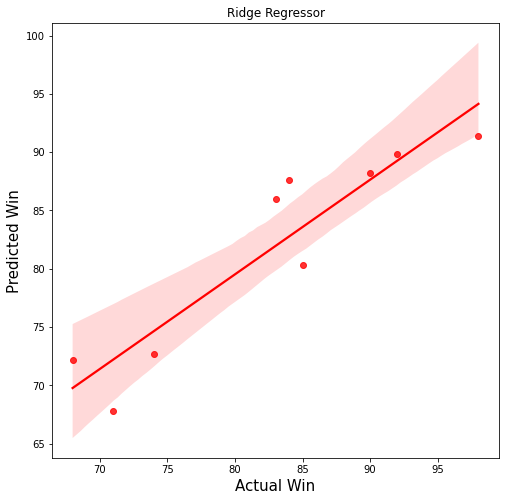

In [71]:
#Let us visualise the result
plt.figure(figsize=(8,8))
sns.regplot(y_test,predicted,color='r')
plt.xlabel('Actual Win',fontsize=15)
plt.ylabel('Predicted Win',fontsize=15)
plt.title("Ridge Regressor")
plt.show()

# Concluding Remarks

1.We predicted the outcomes of MLB matches by collecting the match data of 30 teams in the 2014 season using different Regression Models.

2.The prediction accuracies of different models were then compared and choosed the best model to fit.

3.The prediction results indicated that Ridge model achieved higher prediction accuracy.

# ___XXXXXX____